In [2]:
%matplotlib inline

import cv2
import numpy as np
import pytesseract
from matplotlib import pyplot as plt
import imutils

In [3]:
def img_show(name,img):
    cv2.imshow(name, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    cv2.waitKey(1)

In [4]:
cub = "./receipts/traderjoes.jpg"

In [31]:
img = cv2.imread(cub)
orig = img.copy()

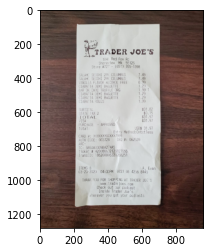

In [32]:
plt.imshow(imutils.opencv2matplotlib(img))

In [7]:
# cv2.imshow('cub_receipt', cubpic)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [8]:
#-----Reading the image-----------------------------------------------------
# cv2.imshow("img",img)
img.shape

(1280, 960, 3)

In [9]:
# Crop the image to remove edges
y = 0
h = 1280
x = 200
w = 720
crop_img = img[y:h,x:w]
img_show("cropped", crop_img)

## Identify the edges

In [27]:
# convert to gray scale, removes color noise
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_show("gray", gray)

In [33]:
# blur the image to remove high frequency noise 
# it helps in finding/detecting contour in gray image
grayImageBlur = cv2.blur(gray,(3,3))
img_show("grayblur", grayImageBlur)

In [34]:
# then we performed canny edge detection
edgedImage = cv2.Canny(grayImageBlur,10,150, 3)
img_show("edged", edgedImage)

In [16]:
# auto canny function from imutils - Doesn't seem to work too well
edgeMap = imutils.auto_canny(gray)
# cv2.imshow("Original", img)
# cv2.imshow("Manual Edge Map", edgedImage)
# cv2.imshow("Automatic Edge Map", edgeMap)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

## Detect receipt edges

In [17]:
# find the contours in the edged image, sort area wise keeping only the largest ones 
allContours = cv2.findContours(edgedImage.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
allContours = imutils.grab_contours(allContours)

len(allContours)
allContours_array = np.array(allContours)
#print(allContours_array)

In [22]:
# descending sort contours area and keep top 1
allContours = sorted(allContours, key=cv2.contourArea, reverse=True)[:1]
# print(allContours)

In [35]:
# show the contour on image
# for conts in allContours:
# approximate the contour
perimeter = cv2.arcLength(allContours[0], True) 
ROIdimensions = cv2.approxPolyDP(allContours[0], 0.02*perimeter, True)

cv2.drawContours(img, [ROIdimensions], -1, (0,255,0), 2)
img_show("Contour Outline", img)

## Identify & Extract Document Boundary Edges

In [ ]:
# reshape coordinates array
ROIdimensions = ROIdimensions.reshape(4,2)

# list to hold ROI coordinates
rect = np.zeros((4,2), dtype=”float32")

# top left corner will have the smallest sum, 
# bottom right corner will have the largest sum
s = np.sum(ROIdimensions, axis=1)
rect[0] = ROIdimensions[np.argmin(s)]
rect[2] = ROIdimensions[np.argmax(s)]
                
# top-right will have smallest difference
# botton left will have largest difference
diff = np.diff(ROIdimensions, axis=1)
rect[1] = ROIdimensions[np.argmin(diff)]
rect[3] = ROIdimensions[np.argmax(diff)]
                
# top-left, top-right, bottom-right, bottom-left
(tl, tr, br, bl) = rect
                
# compute width of ROI
widthA = np.sqrt((tl[0] — tr[0])**2 + (tl[1] — tr[1])**2 )
widthB = np.sqrt((bl[0] — br[0])**2 + (bl[1] — br[1])**2 )
maxWidth = max(int(widthA), int(widthB))
                
# compute height of ROI
heightA = np.sqrt((tl[0] — bl[0])**2 + (tl[1] — bl[1])**2 )
heightB = np.sqrt((tr[0] — br[0])**2 + (tr[1] — br[1])**2 )
maxHeight = max(int(heightA), int(heightB))

## Read Text

In [34]:
text = pytesseract.image_to_string(thresh)
print(text)

:BRE
‘BRLLA LEGUME PASI
WH; BROTH ‘VEGETABL
WH: BROTH «I B
